# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "077873d8a4f31b1fc9cf270fb081402e289e2cfe"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Alpaca Connection
#### Before creating or executing strategy, ensure your alpaca account is bound with Python Build. To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O stochastic_crossover_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/stochastic_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' stochastic_crossover_us.py

--2023-11-28 18:10:49--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/stochastic_crossover.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3020 (2.9K) [text/plain]
Saving to: ‘stochastic_crossover_us.py’

stochastic_crossove 100%[===================>]   2.95K  --.-KB/s    in 0s      

2023-11-28 18:10:49 (52.6 MB/s) - ‘stochastic_crossover_us.py’ saved [3020/3020]



In [6]:
from stochastic_crossover_us import StochasticCrossover as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134223,
 'strategyId': '9b8e09e4326a4b71bd30eb9c7cde09bc'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('GOOGL', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:GOOGL'

## Setup Parameters

In [10]:
parameters = {
  'FASTK_PERIOD': 7,
  'SLOWK_PERIOD': 2,
  'SLOWD_PERIOD': 2
}

In [11]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:GOOGL', 
    lots=15,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'Stochastic Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                     │
╞═════════════════════════╪═══════════════════════════════════════════════════════════╡
│ Strategy Name           │ Stochastic Crossover                                      │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                               │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:GOOGL']                                          │
├─────────────────────────┼───────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 15                                                        │
├─────────────────────────┼────────────────────────

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (6)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

[2023-11-28 18:11:42] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-11-28 18:11:42] Sanity checks on cfg successful.
[2023-11-28 18:11:42] Currency set to "USD"
[2023-11-28 18:11:42] Setting up broker connection...
[2023-11-28 18:11:43] Starting ALPACAV2 in PAPER mode...
[2023-11-28 18:11:44] Broker connection has been setup successfully.
[2023-11-28 18:11:44] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-11-28 18:11:44] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-11-28 18:11:44] Welcome ALGOBULLS VIRTUAL USER!
[2023-11-28 18:11:44] Reading strategy...
[2023-11-28 18:11:44] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0               NASDAQ                    GOOGL 2022-07-18 10:30:00-04:00   
1               NASDAQ                    GOOGL 2022-07-18 12:30:00-04:00   
2               NASDAQ                    GOOGL 2022-07-18 13:30:00-04:00   
3               NASDAQ                    GOOGL 2022-07-18 14:30:00-04:00   
4               NASDAQ                    GOOGL 2022-07-19 09:30:00-04:00   
5               NASDAQ                    GOOGL 2022-07-20 11:30:00-04:00   
6               NASDAQ                    GOOGL 2022-07-21 09:30:00-04:00   
7               NASDAQ                    GOOGL 2022-07-21 10:30:00-04:00   
8               NASDAQ                    GOOGL 2022-07-21 12:30:00-04:00   
9               NASDAQ                    GOOGL 2022-07-21 13:30:00-04:00   
10              NASDAQ                    GOOGL 2022-07-21 14:30:00-04:00   
11              NASDAQ                    GOOGL 2022-07-22 10:30:00-04:00   
12              NASDAQ                    GOOGL 2022-07-25 09:30:00-04:00   
13              NASDAQ                    GOOGL 2022-07-25 11:30:00-04:00   
14              NASDAQ                    GOOGL 2022-07-25 12:30:00-04:00   
15              NASDAQ                    GOOGL 2022-07-25 13:30:00-04:00   
16              NASDAQ                    GOOGL 2022-07-25 14:30:00-04:00   
17              NASDAQ                    GOOGL 2022-07-26 10:30:00-04:00   
18              NASDAQ                    GOOGL 2022-07-26 12:30:00-04:00   
19              NASDAQ                    GOOGL 2022-07-26 13:30:00-04:00   
20              NASDAQ                    GOOGL 2022-07-26 14:30:00-04:00   
21              NASDAQ                    GOOGL 2022-07-27 09:30:00-04:00   
22              NASDAQ                    GOOGL 2022-07-27 11:30:00-04:00   
23              NASDAQ                    GOOGL 2022-07-28 11:30:00-04:00   
24              NASDAQ                    GOOGL 2022-07-29 10:30:00-04:00   
25              NASDAQ                    GOOGL 2022-07-29 12:30:00-04:00   
26              NASDAQ                    GOOGL 2022-07-29 13:30:00-04:00   
27              NASDAQ                    GOOGL 2022-07-29 14:30:00-04:00   
28              NASDAQ                    GOOGL 2022-08-01 11:30:00-04:00   
29              NASDAQ                    GOOGL 2022-08-03 09:30:00-04:00   
30              NASDAQ                    GOOGL 2022-08-03 10:30:00-04:00   
31              NASDAQ                    GOOGL 2022-08-03 12:30:00-04:00   
32              NASDAQ                    GOOGL 2022-08-03 13:30:00-04:00   
33              NASDAQ                    GOOGL 2022-08-03 14:30:00-04:00   
34              NASDAQ                    GOOGL 2022-08-04 12:30:00-04:00   
35              NASDAQ                    GOOGL 2022-08-04 13:30:00-04:00   
36              NASDAQ                    GOOGL 2022-08-04 14:30:00-04:00   
37              NASDAQ                    GOOGL 2022-08-05 09:30:00-04:00   
38              NASDAQ                    GOOGL 2022-08-05 11:30:00-04:00   
39              NASDAQ                    GOOGL 2022-08-05 12:30:00-04:00   
40              NASDAQ                    GOOGL 2022-08-05 13:30:00-04:00   
41              NASDAQ                    GOOGL 2022-08-05 14:30:00-04:00   
42              NASDAQ                    GOOGL 2022-08-08 10:30:00-04:00   
43              NASDAQ                    GOOGL 2022-08-11 10:30:00-04:00   
44              NASDAQ                    GOOGL 2022-08-15 09:30:00-04:00   
45              NASDAQ                    GOOGL 2022-08-15 12:30:00-04:00   
46              NASDAQ                    GOOGL 2022-08-15 13:30:00-04:00   
47              NASDAQ                    GOOGL 2022-08-15 14:30:00-04:00   
48              NASDAQ                    GOOGL 2022-08-16 12:30:00-04:00   
49              NASDAQ                    GOOGL 2022-08-16 13:30:00-04:00   
50              NASDAQ                    GOOGL 2022-08-16 14:30:00-04:00   


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2022-07-18
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      49.0%

Cumulative Return   -4.26%
CAGR﹪              -4.13%

Sharpe              -0.44
Prob. Sharpe Ratio  25.38%
Sortino             -0.59
Sortino/√2          -0.41
Omega               0.9

Max Drawdown        -6.46%
Longest DD Days     375

Gain/Pain Ratio     -0.13
Gain/Pain (1M)      -0.45

Payoff Ratio        1.0
Profit Factor       0.9
Common Sense Ratio  0.95
CPC Index           0.42
Tail Ratio          1.06
Outlier Win Ratio   8.41
Outlier Loss Ratio  3.41

MTD                 -2.78%
3M                  -1.28%
6M                  -1.01%
YTD                 -1.72%
1Y                  -3.06%
3Y (ann.)           -4.13%
5Y (ann.)           -4.13%
10Y (ann.)          -4.13%
All-time (ann.)     -4.13%

Avg. Drawdown       -6.46%
Avg. Drawdown Days  375
Recovery Factor     -0.66
Ulcer Index         0.03
Serenity Index   

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2022-07-18
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             49.0%

Cumulative Return          -4.26%
CAGR﹪                     -4.13%

Sharpe                     -0.44
Prob. Sharpe Ratio         25.38%
Smart Sharpe               -0.44
Sortino                    -0.59
Smart Sortino              -0.58
Sortino/√2                 -0.41
Smart Sortino/√2           -0.41
Omega                      0.9

Max Drawdown               -6.46%
Longest DD Days            375
Volatility (ann.)          4.24%
Calmar                     -0.64
Skew                       -0.75
Kurtosis                   7.75

Expected Daily %           -0.01%
Expected Monthly %         -0.33%
Expected Yearly %          -2.15%
Kelly Criterion            -5.44%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.45%
Expected Shortfall (cVaR)  -0.45%

Max Consecutive Wi

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-07-21  2023-02-09  2023-07-31   375     -6.455904          -5.50859

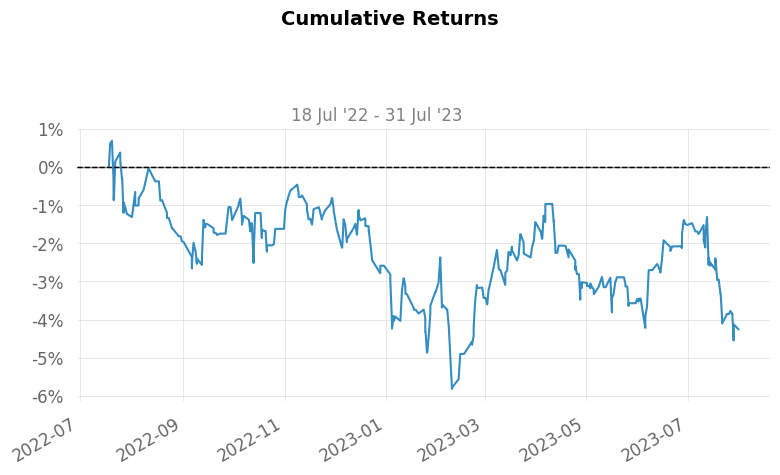

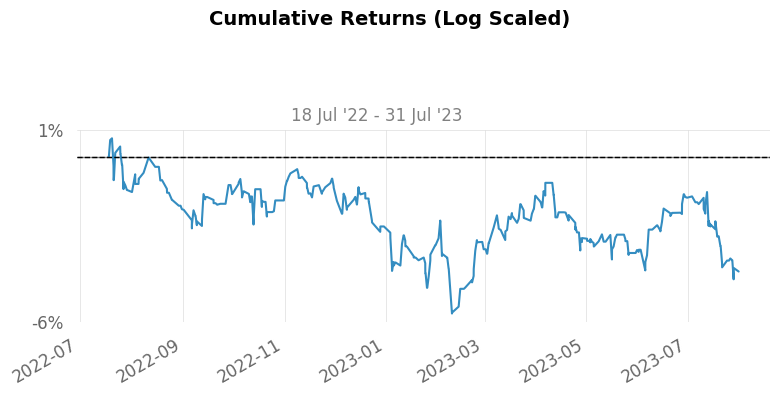

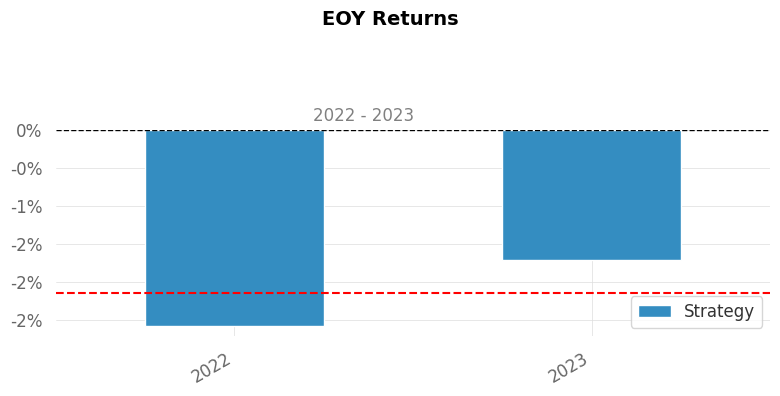

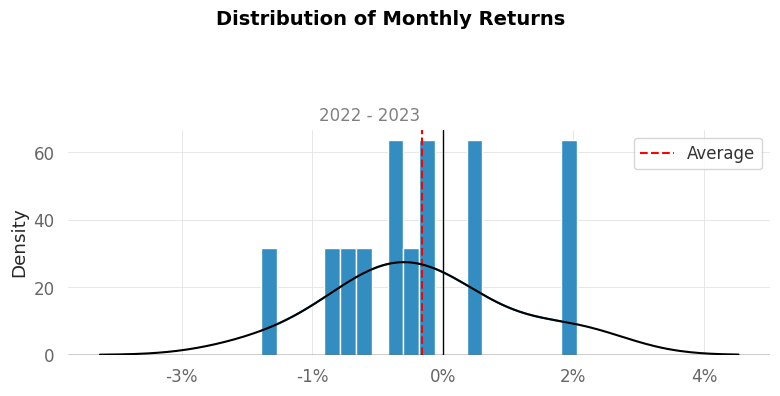

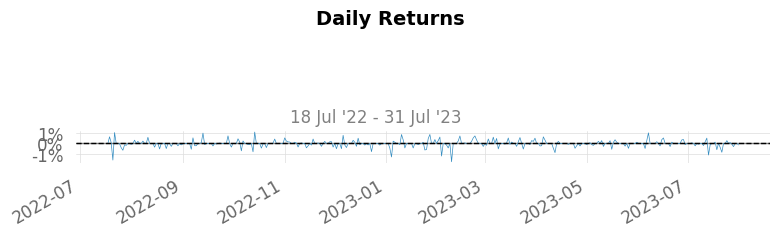

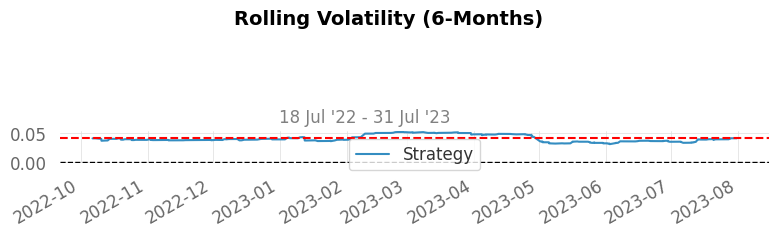

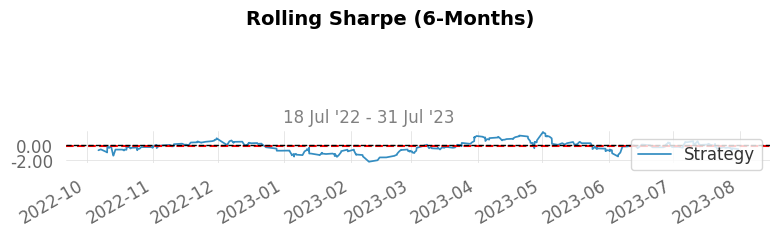

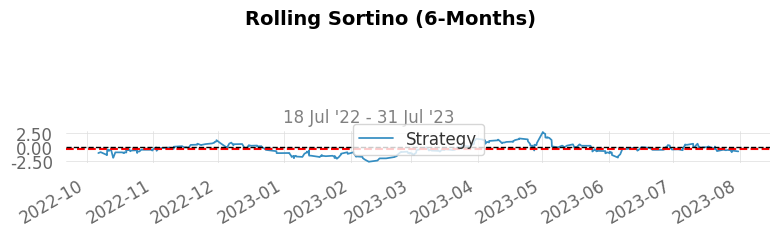

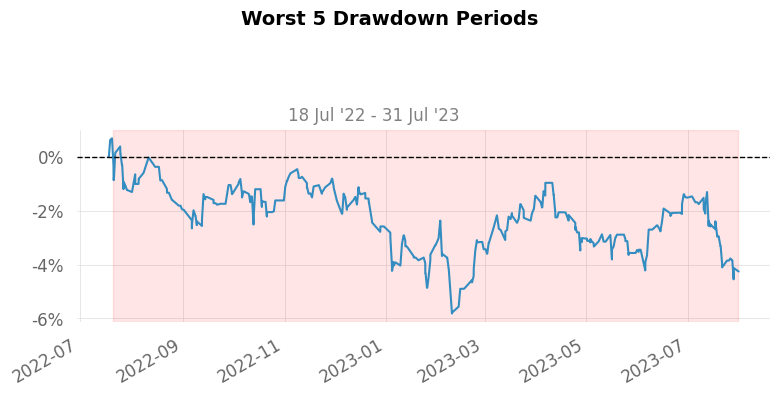

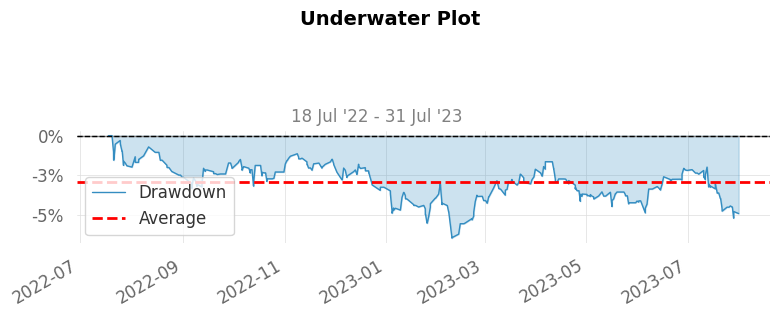

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


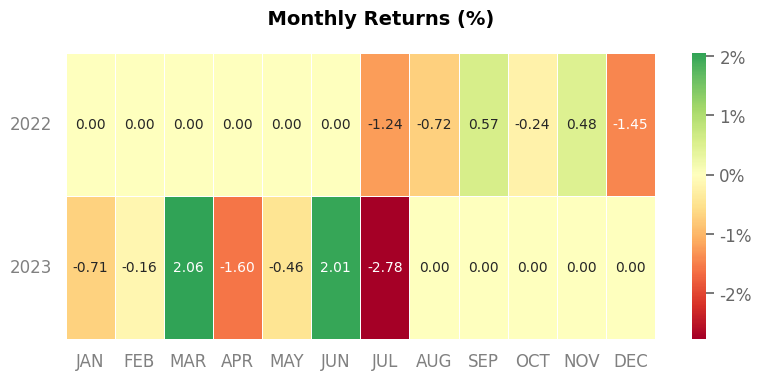

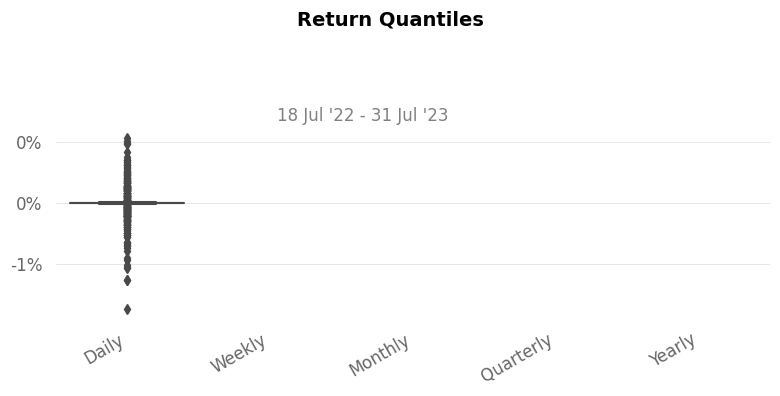

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 3d04f346c4454d4f92292e12fa84e93d |
| Transaction Type | BUY                              |
| Instrument       | NASDAQ:GOOGL                     |
| Quantity         | 15                               |
| Price            | $133.03                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-11-28T12:48:23.173732Z | COMPLETE               |
| 2023-11-28T12:48:23.173715Z | OPEN                   |
| 2023-11-28T12:48:23.173697Z | OPEN PENDING           |
| 2023-11-28T12:48:23.173676Z | VALIDATION PENDING     |
| 2023-11-28T12:48:23.173625Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 0454ac42f65b4754a

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:GOOGL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute'
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='9:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:GOOGL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)